In [60]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem,Descriptors
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import skim
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [61]:
data = pd.read_csv('Data1.csv')

In [62]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3366   │ │ string      │ 24    │                                                          │
│ │ Number of columns │ 35     │ │ int32       │ 8     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA ┃ NA % ┃ mean     ┃ sd      ┃ p0     ┃ p25     ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Unnamed: 0   │  0 │    0 │     2800 │    1700 │      0 │    1400 │     2800 │     4000 │     6400 │ ▇▇▇▇▅▃ │  │
│ │ activity_id  │  0 │    0 │ 11000000 │ 7600000 │  72000 │ 2600000 │ 14000000 │ 18000000 │ 25000000 │ ▇▂▁▅▇▁ │  │
│ │ document_yea │  0 │    0 │     2000 │     6.9 │   2000 │    2000 │     2000 │     2000 │     2000 │ ▃▁▂▇▇▇ │  │
│ │ r            │    │      │          │         │        │         │          │          │          │        │  │
│ │ pchembl_valu │  0 │    0 │      6.3 │     1.6 │      3 │       5 │        6 │      7.6 │       11 │ ▂▇▇▅▅▁ │  │
│ │ e            │    │      │          │         │        │         │          │          │          │        │  │
│ │ potential_du │  0 │    0 │     0.06 │    0.24 │      0 │       0 │        0 │        0 │        1 │ ▇    ▁ │  │
│ │ plicate      │    │      │          │         │        │         │          │          │          │        │  │
│ │ record_id    │  0 │    0 │  1800000 │ 1100000 │  23000 │  770000 │  1900000 │  3000000 │  3900000 │ ▅▃▅▃▇▁ │  │
│ │ src_id       │  0 │    0 │        1 │       0 │      1 │       1 │        1 │        1 │        1 │     ▇  │  │
│ │ standard_fla │  0 │    0 │        1 │       0 │      1 │       1 │        1 │        1 │        1 │     ▇  │  │
│ │ g            │    │      │          │         │        │         │          │          │          │        │  │
│ │ standard_val │  0 │    0 │  1.4e-09 │ 6.9e-08 │ 1.6e-2 │ 1.1e-16 │  3.1e-13 │  9.3e-12 │    4e-06 │   ▇    │  │
│ │ ue           │    │      │          │         │        │         │          │          │          │        │  │
│ │ target_tax_i │  0 │    0 │   270000 │  150000 │   1300 │  210000 │   380000 │   380000 │   650000 │  ▃▃ ▇  │  │
│ │ d            │    │      │          │         │        │         │          │          │          │        │  │
│ │ value        │  0 │    0 │  1.2e-05 │ 2.8e-05 │  3e-11 │ 2.7e-08 │  9.4e-07 │  1.1e-05 │    0.001 │   ▇    │  │
│ └──────────────┴────┴──────┴──────────┴─────────┴────────┴─────────┴──────────┴──────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━

In [63]:
data = data[['canonical_smiles', 'standard_value','target']]
data['standard_value'] = pd.to_numeric(data['standard_value'])
data = data.dropna()

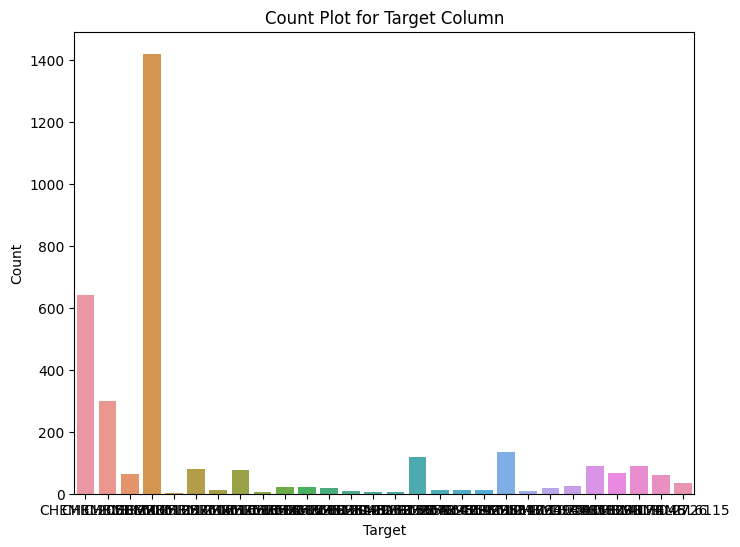

In [64]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=data)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Count Plot for Target Column')
plt.show()

In [65]:
def generate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    AllChem.Compute2DCoords(mol)
    descriptors = [Descriptors.MolWt(mol), Descriptors.MolLogP(mol), Descriptors.NumHDonors(mol), Descriptors.NumHAcceptors(mol)]
    return descriptors

In [ ]:
data['descriptors'] = data['canonical_smiles'].apply(generate_descriptors)
data[['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']] = pd.DataFrame(data['descriptors'].tolist(), index=data.index)

In [ ]:
min_value = data['standard_value'].min()
max_value = data['standard_value'].max()

data['scaled_value'] = (data['standard_value'] - min_value) / (max_value - min_value)

In [66]:
data.head()

,canonical_smiles,standard_value,target,descriptors,MW,LogP,NumHDonors,NumHAcceptors,scaled_value
0,CC(=O)NC1C(O)C=C(C(=O)O)OC1[C@H](O)[C@H](O)CO,4.000000e-06,CHEMBL2051,"[291.2559999999997, -3.066599999999999, 6, 8]",291.256,-3.06660,6,8,1.000000e+00
1,CC(=O)NC1C(NC(=N)N)C=C(C(=O)O)OC1C(O)[C@H](O)CO,1.000000e-09,CHEMBL2051,"[332.3129999999997, -3.5758299999999976, 8, 8]",332.313,-3.57583,8,8,2.500000e-04
2,CC(=O)NC1C(N)C=C(C(=O)O)OC1[C@H](O)[C@H](O)CO,4.000000e-08,CHEMBL2051,"[290.27199999999965, -3.100199999999998, 6, 8]",290.272,-3.10020,6,8,1.000000e-02
3,CC(=O)N[C@@H]([C@H](O)[C@H](O)CO)[C@H]1OC(O)(C...,4.000000e-11,CHEMBL2051,"[309.2709999999997, -3.8717999999999964, 7, 9]",309.271,-3.87180,7,9,1.000000e-05
4,CCCCC(NC(C)=O)[C@@H]1CC(C(=O)O)C[C@H]1N=C(N)N,1.000000e-13,CHEMBL2051,"[298.3869999999995, 0.4341000000000024, 4, 4]",298.387,0.43410,4,4,2.500000e-08


In [ ]:
data = data.drop(['canonical_smiles', 'descriptors', 'scaled_value'], axis=1)
sns.pairplot(data = data,hue ='target')

In [67]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.49851632047477745
Confusion Matrix:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   1   0   0   3]
 [  0   5   0   0   2   0   0   0   0   0   0   5   0   0   0   0   0   2
    0   0   0   0   0   0   0   0   4]
 [  0   0   0   0   1   0   0   0   0   0   0   3   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   1   0   0   0   1   0   1   1   0   0   0   0   0   3
    0   0   1   1   0   1   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   0   0   0   0   1]
 [  0   0   0   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0   

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
classifier = RandomForestClassifier(n_estimators=100,class_weight='balanced', random_state=42)

classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

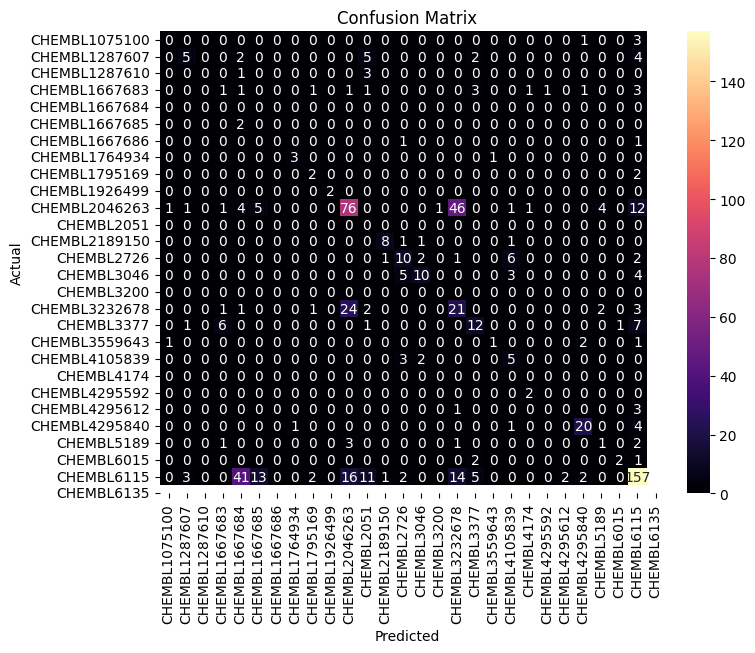

In [68]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()